In [1]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os

!pip install -Uqq fastai 'duckduckgo_search>=6.2'


from duckduckgo_search import DDGS #DuckDuckGo has changed the api so we need to update
from fastcore.all import *

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
import time, json

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 79.9 MB/s eta 0:00:00


In [12]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('volvo', max_images=1)
urls[0]

'https://volvocarkalisz.volvocars-partner.pl/app/uploads/sites/3/fly-images/4952/Volvo-XC60-Essential-Volvo-Car-Kalisz-5-1918x0-c.jpg?hash=1205538040'

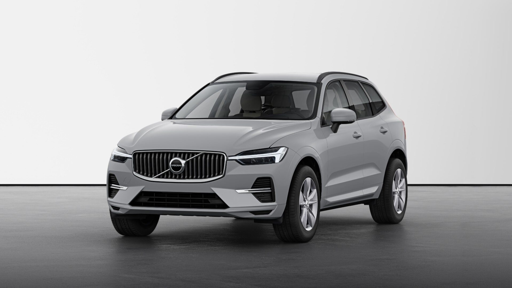

In [13]:
from fastdownload import download_url
dest = 'volvo.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(512,512)

In [14]:
searches = 'Volvo','Lexus'
path = Path('what_car')

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=512, dest=path/o)

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1045: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [15]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

28

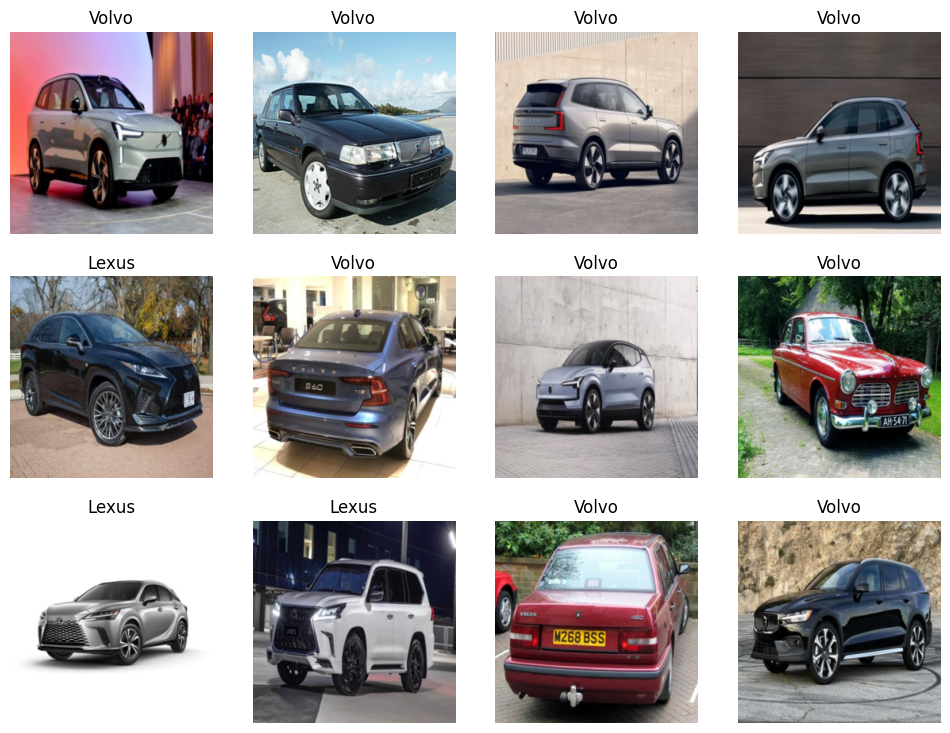

In [16]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(256, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=12)

In [17]:
#The learner needs to be passed in: dataloader object and the neural-network models(already been pre-trained)
learn = vision_learner(dls, resnet50, metrics=error_rate)

#Adjust the parameters particularly for this project
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 81.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.960417,0.517423,0.193548,03:20


epoch,train_loss,valid_loss,error_rate,time
0,0.275410,0.466917,0.177419,04:08
1,0.213264,0.391245,0.161290,04:07
2,0.159327,0.421672,0.161290,04:02


In [19]:
what_car,_,probs = learn.predict(PILImage.create('volvoTest1.jpg'))
print(f"This is a: {what_car}.")
print(f"Probability of the current prediction: {probs[0]:.4f}")

This is a: Volvo.
Probability of the current prediction: 0.3897


In [20]:
what_car,_,probs = learn.predict(PILImage.create('volvoTest2.jpg'))
print(f"This is a: {what_car}.")
print(f"Probability of the current prediction: {probs[0]:.4f}")

This is a: Lexus.
Probability of the current prediction: 0.6870


In [21]:
what_car,_,probs = learn.predict(PILImage.create('lexusTest1.jpg'))
print(f"This is a: {what_car}.")
print(f"Probability of the current prediction: {probs[0]:.4f}")

This is a: Lexus.
Probability of the current prediction: 0.9998


In [22]:
what_car,_,probs = learn.predict(PILImage.create('lexusTest2.jpg'))
print(f"This is a: {what_car}.")
print(f"Probability of the current prediction: {probs[0]:.4f}")

This is a: Lexus.
Probability of the current prediction: 0.9397
